# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
!pip install --upgrade pip
!pip install -r requirements.txt

  Using cached argparse-1.1-py3-none-any.whl


In [2]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization


## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [3]:
## Data loading
data_name = 'energy'
seq_len = 24

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

energy dataset is ready.


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [4]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [5]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2022-01-04 11:18:52.327904: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-04 11:18:52.364615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:86:00.0
2022-01-04 11:18:52.365663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:87:00.0
2022-01-04 11:18:52.365981: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2022-01-04 11:18:52.366691: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: 

2022-01-04 11:18:52.651691: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55dd98c767c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-01-04 11:18:52.651738: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2022-01-04 11:18:52.651758: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla K80, Compute Capability 3.7
2022-01-04 11:18:52.652308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 11:18:52.652345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


Start Embedding Network Training
step: 0/10000, e_loss: 0.2531
step: 1000/10000, e_loss: 0.096
step: 2000/10000, e_loss: 0.083
step: 3000/10000, e_loss: 0.0774
step: 4000/10000, e_loss: 0.0643
step: 5000/10000, e_loss: 0.0622
step: 6000/10000, e_loss: 0.0577
step: 7000/10000, e_loss: 0.0558
step: 8000/10000, e_loss: 0.0544
step: 9000/10000, e_loss: 0.0532
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.202
step: 1000/10000, s_loss: 0.032
step: 2000/10000, s_loss: 0.0278
step: 3000/10000, s_loss: 0.0265
step: 4000/10000, s_loss: 0.0261
step: 5000/10000, s_loss: 0.0262
step: 6000/10000, s_loss: 0.026
step: 7000/10000, s_loss: 0.0256
step: 8000/10000, s_loss: 0.0252
step: 9000/10000, s_loss: 0.0255
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.392, g_loss_u: 0.5302, g_loss_s: 0.031, g_loss_v: 0.3084, e_loss_t0: 0.096
step: 1000/10000, d_loss: 1.8676, g_loss_u: 1.2179, g_loss_s: 0.0324, g_loss_v: 

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [6]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.


2022-01-04 12:27:16.505450: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:27:16.505520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2022-01-04 12:27:50.482012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:27:50.482097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2022-01-04 12:28:23.296248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:28:23.296332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2022-01-04 12:28:56.939679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:28:56.939764: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2022-01-04 12:29:31.707830: I tensorflow

Discriminative score: 0.4946


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [7]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

2022-01-04 12:30:04.316435: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:30:04.316513: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2022-01-04 12:31:44.046921: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:31:44.046992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2022-01-04 12:33:22.167627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-01-04 12:33:22.167693: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

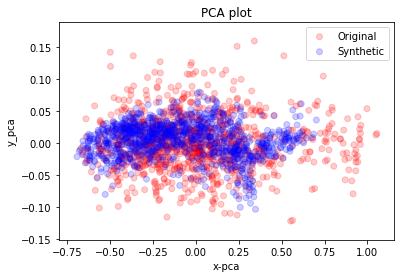

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...


/root/Data_Science_Lab_WiSe_Passau/.venv/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/root/Data_Science_Lab_WiSe_Passau/.venv/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


[t-SNE] Computed neighbors for 2000 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.049401
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.034927
[t-SNE] KL divergence after 300 iterations: 1.283185


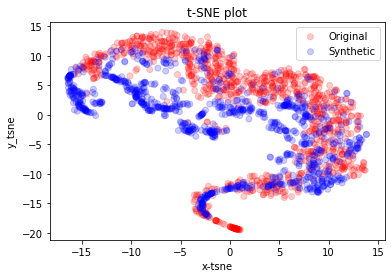

In [ ]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')